In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [100]:
data = pd.read_csv("../ml_src/algo/final.csv", index_col=0)

In [101]:
data.head()

,text,y
0,urgent business assistance and partnershipdear...,1
1,i am mr ben suleman a custom officer and work ...,1
2,his royal majesty hrm crown ruler of eleme ki...,1
3,his royal majesty hrm crown ruler of eleme ki...,1
4,it is with a heart full of hope that i write...,1


# Fraudulent

In [126]:
data.iloc[1800].text

'hellomy name is simon nicolas and i am the general manager of ifsd inc internationalpany  httpfinancenet  and i would like to make you a favorable offernow there is some information about ourpany our activity lies in planning for private persons and thepanies how they receive their current payments we help the ones who want to get the remittances  their foreign clients without any problemourpany is engaged in a wide international activity we work with the organizations and private persons  the various countries worldwide we keep broadening our activity we offer new kinds of services we expand the staff we open our representative offices all over the worldas ourpany is expanding its international activity we are in need of new employees in various countries now we are looking for new people to take the vacant places of regional financial managersa regional financial manager deals with bank transfers and checks as our clients are private persons andpanies  different countries we hire pe

# Non-Fraudulent

In [103]:
data.iloc[20000].text

'there are several changes to the direct report meeting in november  first the meeting will now conclude by 1200 noon on friday november 9  second the activities portion of the trip will not be sponsored by enroneach individual will be responsible personally for payment of activity of choice  most individuals either chose golf or horseback ridingbelow is an estimate as to how much these activities will costgolfgreen feeseastwest course1550018 holes includes golf cart use of practice balls club care  storageeastwest course85009 holesincludes  same as abovemountain course950018 holes  includes  same as abovemountain course50009 holes includes  same as aboverentalsgolf clubs with sleeve of balls5500golf shoes2000horseback riding1hour2500person1hour pkg3500person pkg includes shuttle ride to stables2hour4000person2hour pkg5000person pkg includes shuttle ride to stablesmini ridegroup only 1500approximately 20 minutesif you have an interest in the spa services that are available please let m

# TF-IDF

In [13]:
stop_words = []

with open('../ml_src/algo/stop_words.txt', 'r') as f:
    for _ in range(127):
        tmp = f.readline()
        tmp = tmp.replace('\n', '')
        stop_words.append(tmp)

In [6]:
X, y = data['text'], data['y']

In [7]:
tfidf = TfidfVectorizer(max_df=0.01, stop_words=stop_words)

In [8]:
X = np.array(X, dtype='U')

In [9]:
tfidf.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.01, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', '...'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
tfidf.stop_words_

{'agreement',
 'attached',
 'calendar',
 'call',
 'credit',
 'date',
 'day',
 'deal',
 'dear',
 'dont',
 'draft',
 'email',
 'enron',
 'file',
 'find',
 'following',
 'friday',
 'gas',
 'get',
 'go',
 'going',
 'good',
 'hey',
 'hi',
 'im',
 'jeff',
 'know',
 'last',
 'let',
 'letter',
 'like',
 'list',
 'mark',
 'may',
 'meeting',
 'monday',
 'need',
 'new',
 'office',
 'one',
 'per',
 'please',
 'received',
 'report',
 'request',
 'review',
 'revised',
 'schedule',
 'see',
 'send',
 'sent',
 'sorry',
 'start',
 'th',
 'thanks',
 'think',
 'time',
 'today',
 'us',
 'want',
 'week',
 'would'}

In [11]:
X_tf = tfidf.transform(X)

# Validation curve

In [14]:
def plot_val_curve(param_name, param_range):
    train_score, test_score = validation_curve(
        BernoulliNB(),
        X_tf, y,
        param_name=param_name,
        param_range=param_range,
        cv=10,
        scoring='recall'
    )
    
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    
    plt.plot(param_range, train_score_mean, c='k', label='train')
    plt.plot(param_range, test_score_mean, c='r', label='test')
    plt.ylabel('recall')
    plt.legend()

/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: Use

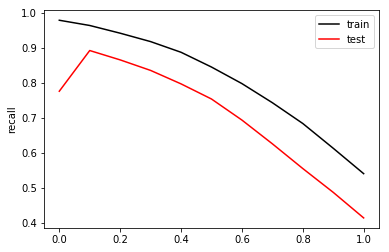

In [15]:
plot_val_curve('alpha', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Learning-curve

In [16]:
def plot_learning_curve():
    train_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    train_size, train_score, test_score = learning_curve(
        BernoulliNB(alpha=0.1, binarize=0.0),
        X_tf, y,
        train_sizes=train_range,
        cv=10,
        scoring='recall'
    )
    
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    
    plt.plot(train_size, train_score_mean, c='k', label='train')
    plt.plot(train_size, test_score_mean, c='r', label='test')
    #plt.xlim([0, 0.4])
    plt.ylabel('recall')
    plt.legend()

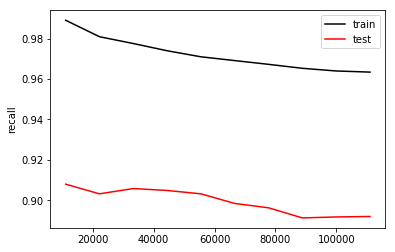

In [17]:
plot_learning_curve()

# Cross-validation (K=10)

In [28]:
results = cross_validate(BernoulliNB(alpha=0.1, binarize=0.0), X_tf, y, scoring='recall', cv=10)

In [29]:
np.mean(results['test_score']) # RECALL SCORE

0.8919990908057732

In [61]:
results = cross_validate(BernoulliNB(alpha=0.1, binarize=0.0), X_tf, y, scoring='accuracy', cv=10)

In [62]:
np.mean(results['test_score']) # ACCURACY SCORE

0.9484968085429223

# Classification Report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.3)

In [64]:
clf = BernoulliNB(alpha=0.1, binarize=0.0)

In [65]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [66]:
pred = clf.predict(X_test)

In [67]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     35723
          1       0.72      0.93      0.81      1306

avg / total       0.99      0.98      0.99     37029



# ROC curve

In [68]:
y_scores = clf.predict_proba(X_test)

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

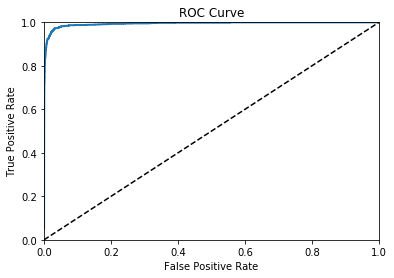

In [71]:
plot_roc_curve(fpr, tpr, label='NaiveBayes')

In [72]:
roc_auc_score(y_test, y_scores[:, 1])

0.993914111296813